## Introduction to Deep Learning 
# Part 4 - Multilayer Perceptron with Keras
### Build and visualize Simple feed forward dense network with Mnist data

In [69]:
import matplotlib.pyplot as plt
import matplotlib_utils as umplot
import importlib
importlib.reload(umplot)

import numpy as np
import utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
%matplotlib inline  

## Lets start Keras
In the Mnist classification example, we saw that the net basically learn templates.<br>
This is not robust enough for generalization. <br>
To generalize, we want the neural network to learn **features**. <br>
For that we will need deeper and more complexed networks.<br>
Lets build our first neural network with Keras.

In [5]:
import keras
# Keras has many build in data sets
from keras.datasets import mnist
# Sequential is the basic feed forward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout
# Read about optimizers in keras documentation
from keras.optimizers import RMSprop

#### Load and normalize data set

In [6]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
# create "dummy" variables for each category
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Create the model
In previous chapter,I used the word network,in practical world, it called model.<br>
Model is from keras examples: https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

In [8]:
# Create the model, and lay the layers oneontop of the other
# specifing layers parameters.
def get_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [9]:
# Create the model, the network
model = get_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Train the model
While training the model, lets view the layers, meaning the incoming weights, to each neuron in the layer. Lets train for 2 epoch's, and examine the results. 

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 10s 173us/step - loss: 0.2201 - acc: 0.9325 - val_loss: 0.1362 - val_acc: 0.9594
Epoch 2/2
60000/60000 [==============================] - 10s 173us/step - loss: 0.0807 - acc: 0.9751 - val_loss: 0.0730 - val_acc: 0.9782


### First Hidden Layer
First layer is a dense layer of size 512, meaning that each input pixel intensity, from the 764 inputs, is connected to each neuron in the hidden layer.<br>
So we get $784*512$ incoming weights to the first hidden layer. Lets look at them:

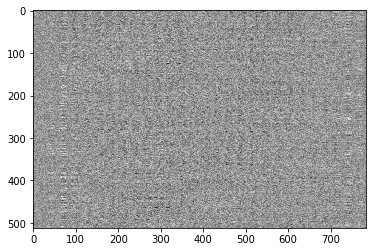

In [11]:
W0 = model.get_layer(name='dense_1').get_weights()[0]
W0a=W0.reshape((784,512)).copy()
plt.imshow(W0a.T);
plt.set_cmap('gray')

Each row in the above matrix,is multiplication by the input layer pixels intensities,or the input vector, and produce $512$ input vector to the next layer.<br>
To demonstrate the weights, we will reshape each row(of 784 weights) back to the (28,28) original shape, so we can see what patterns are causing activation.

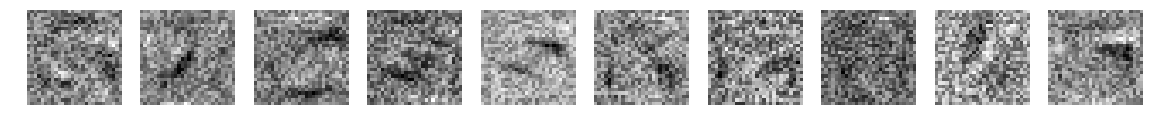

In [71]:
import utils_plot as uplot
dense_list0 = [W0a.T[i, :].reshape(28,28) for i in range(10)]
umplot.show_list_images(dense_list0)

### Activation Example of the First Hidden Layer
Lets check the network "response" or activation, to one of the digit images from the test set, and follow the weighs and activation flow down to the last output layer.<br>
To do that, we multiply $W^T*X$,where $X$ is an input image. <br>
The image:

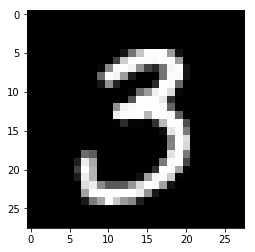

In [13]:
W70=W0a.T*x_test[90]
plt.imshow(x_test[90].reshape(28,28))

Lets view the activation of the image, the result of the multiplication above.

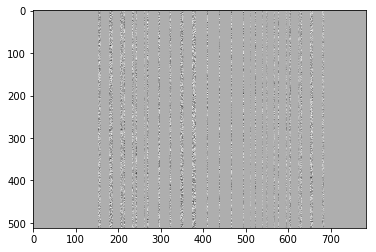

In [14]:
plt.imshow(W70)

Again,to understand the activation patterns,we reshape them back to the(28,28) original shape.

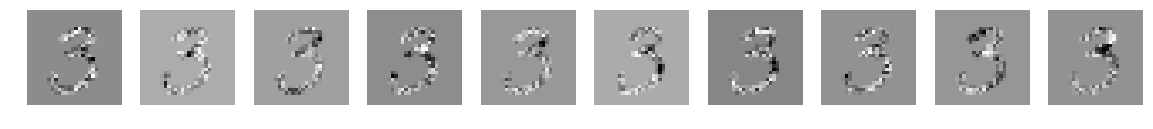

In [72]:
dense_list70 = [W70[i, :].reshape(28,28) for i in range(10)]
umplot.show_list_images(dense_list70)

### Second hodden layer

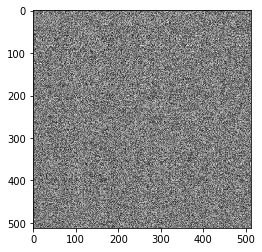

In [16]:
W1 = model.get_layer(name='dense_2').get_weights()[0]
Wa1=W1.reshape((512,512)).copy()
plt.imshow(Wa1)

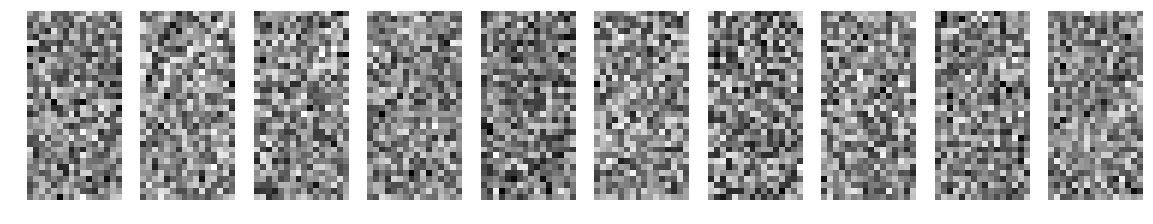

In [73]:
dense_list1= [Wa1[i,:].reshape(32,16) for i in range(10)]
umplot.show_list_images(dense_list1)


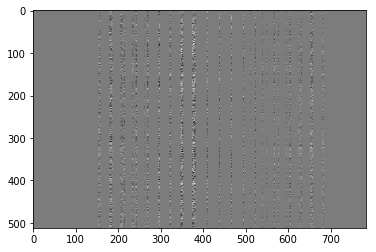

In [18]:
W17 = np.dot((Wa1.T),W70)
plt.imshow(W17)

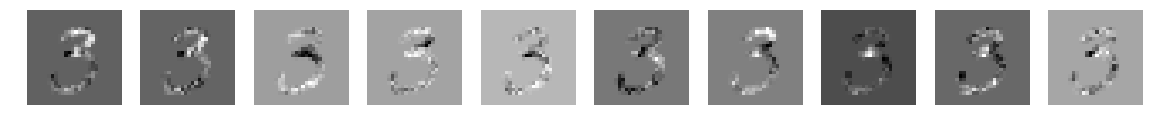

In [74]:
dense_list17= [W17[i,:].reshape(28,28) for i in range(10)]
umplot.show_list_images(dense_list17)

### Last Dense Layer
Last dense layer size is 10, as the number of classes. Following is a view of this Layer, as a matrix, and with each row resized to a rectangle.

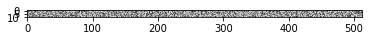

In [20]:
W2 = model.get_layer(name='dense_3').get_weights()[0]
W2a=W2.reshape((10,512)).copy()
plt.imshow(W2a)

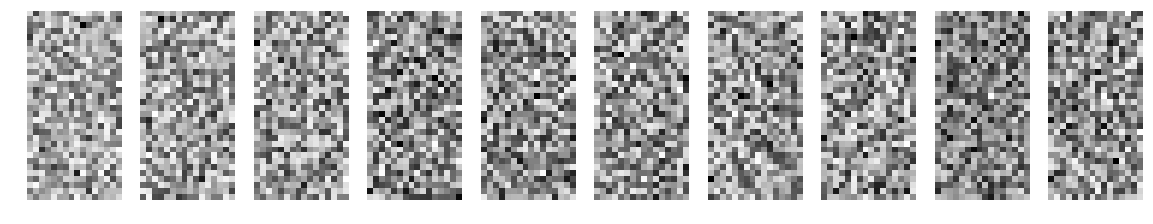

In [75]:

dense_list2= [W2a[i, :].reshape(32,16) for i in range(10)]
umplot.show_list_images(dense_list2)

Hard to see any patterns in this layer visualization. 

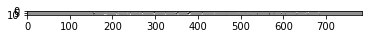

In [78]:
W27=np.dot(W2.T,W17)
plt.imshow(W27)

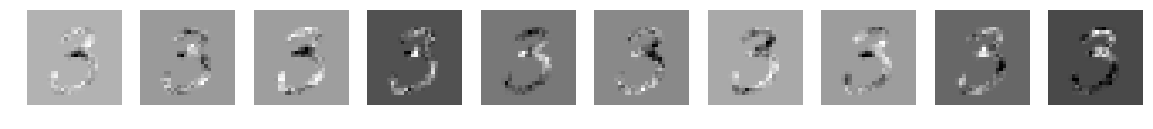

In [76]:
dense_list27= [W27[i, :].reshape(28,28) for i in range(10)]
umplot.show_list_images(dense_list27)

### Apply Softmax on the last hidden layer.
We can see from the weights image, that the "template" or row for the digit 3, is standing out in the activation row, and that is reflected in the numbers.

In [25]:
print([W27[i].sum() for i in range(10)])
x = [W27[i].sum() for i in range(10)]
pred = np.exp(x)/np.sum(np.exp(x))
for i in range(10):
    print("{0:.2f}".format(pred[i]), end=' ')

[-0.7886162, -11.390605, 2.506487, 53.71811, -14.998921, -15.87208, -40.343307, -13.717381, 35.983727, 27.347942]
0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 

We can see quit clearly the performing templates, it can easily bring to over-fit. To decrease the chances of that, we add a down-sampling,or noising layer, called Dropout. 
## Dropout hidden layer
The method: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a given fraction, randomly chosen p, of nodes.<br>
Dropout forces a neural network to learn more robust features.<br>
Lets compare the results of the previous network, to a network with dropout layers,between the dense layers:

In [26]:
# Create the model, and lay the layers oneontop of the other
# specifing layers parameters.
def get_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [27]:
# Initialize model, and train for 10 epoch
model = get_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.2432 - acc: 0.9236 - val_loss: 0.1163 - val_acc: 0.9641
Epoch 2/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.1026 - acc: 0.9694 - val_loss: 0.0857 - val_acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0742 - acc: 0.9776 - val_loss: 0.0712 - val_acc: 0.9804
Epoch 4/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0631 - acc: 0.9811 - val_loss: 0.0692 - val_acc: 0.9812
Epoch 5/10
60000/60000 [==============================] - 13s 216us/step - loss: 0.0502 - acc: 0.9853 - val_loss: 0.0715 - val_acc: 0.9811
Epoch 6/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.0437 - acc: 0.9873 - val_loss: 0.0773 - val_acc: 0.9820
Epoch 7/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0377 - acc: 0.9884 - val_loss: 0.

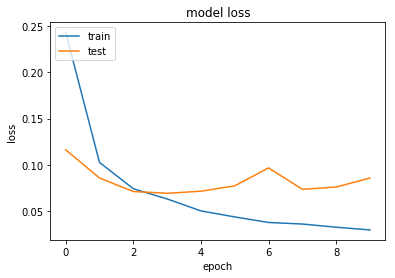

In [29]:
uplot.drow_history(history, 'loss')

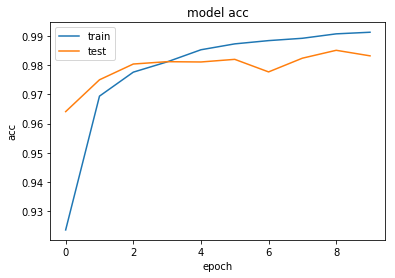

In [30]:
uplot.drow_history(history, 'acc')

We can see that 2 epoch is best suitable for this classification task. After 2 epoch, the net starts to overffit to the data.

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08573273261687704
Test accuracy: 0.9832


## Predict
Following are few predictions of the trained network.

In [57]:
print(type(x_train))

<class 'numpy.ndarray'>


In [58]:
x = x_test[100:120]

predictions_classes = model.predict_classes(x);
print('Predictions:\n')
print(predictions)
print('\nTrue Lables:\n')
print(np.argmax(y_test[100:120],axis=1))


Predictions:

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]

True Lables:

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]


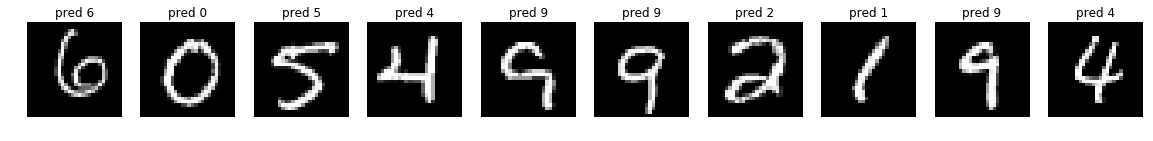

In [70]:

imgs = [x_test[i].reshape(28,28) for i in range(100,110)]
titles = [("pred {}").format(predictions[i]) for i in range(20)]
umplot.show_list_images(imgs, titles)

We can see that the prediction are very accurate, but we can see as well that the network is limited in its ability to understand digits in different locations and orientations. <br>
Lets think about the following idea: We have an image, with a digit inside. if we can "move" our network around, and position it on the part containing the digit, in the right orientation, we can  classify the digit correctly. This is, in a very simplified form, the idea of **convolutional neural  networks**. They work with sets of filters, slided over the image, to capture specific features, without being bind to specific location.

### Learn more:
* https://keras.io/
* https://www.coursera.org/learn/neural-networks/lecture/kOQiH/why-object-recognition-is-difficult-5-min

### Articles:
* **Improved Dropout for Shallow and Deep Learning**, Zhe Li1, Boqing Gong, Tianbao Yang.
The University of Iowa, Iowa city, IA 52245. University of Central Florida, Orlando, FL 32816. https://arxiv.org/pdf/1602.02220.pdf
* **Dropout: A Simple Way to Prevent Neural Networks from Overfitting**, Nitish Srivastava,Geoffrey Hinton, Alex Krizhevsky, Ruslan Salakhutdinov, Ilya Sutskever. June 2014Journal of Machine Learning Research 15(1):1929-1958
* **On the importance of initialization and momentum in deep learning**. Ilya Sutskever, James Martens, George Dahl, Geoffrey Hinton. ICML'13 Proceedings of the 30th International Conference on International Conference on Machine Learning - Volume 28 Pages III-1139-III-1147. Atlanta, GA, USA — June 16 - 21, 2013 http://proceedings.mlr.press/v28/sutskever13.pdf

